<a href="https://colab.research.google.com/github/AzlinRusnan/Machine-Learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification** in machine learning is a type of problem where the goal is to predict the category or class that an item belongs to, based on its features. For example, if you have emails, you might want to classify them as either "spam" or "not spam."

**Here's a simple breakdown:**

1. **Data with Labels:** You start with data where each item is labeled with the correct category. For instance, emails that are already marked as spam or not spam.

2. **Training:** You use this labeled data to teach a machine learning model to recognize patterns. This process is called training.

3. **Model:** The model learns from the training data to understand how the features (like words in the email) relate to the labels (spam or not spam).

4. **Prediction:** Once the model is trained, you can give it new, unlabeled data, and it will predict the category for each item. For example, it will classify new emails as either spam or not spam.

5. **Evaluation:** You check how well the model is doing by comparing its predictions to the actual labels on a set of test data. This helps you understand the accuracy of your model.

In summary, classification is about teaching a computer to automatically sort items into predefined categories based on example data.


---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
file_path = '/content/gdrive/MyDrive/STQD 6024 Machine Learning/default.csv'
default = pd.read_csv(file_path)
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


(-100.0, 2500.0)

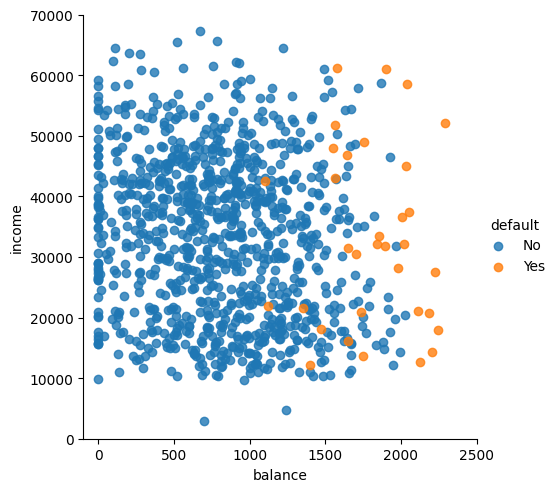

In [4]:
sns.lmplot(x='balance', y='income', data=default.sample(1000), hue='default', fit_reg=False)
plt.ylim([0,70000])
plt.xlim([-100,2500])

In summary, from this plot, it can be inferred that individuals with higher balances are more likely to default, while income does not have a clear correlation with the likelihood of defaulting.

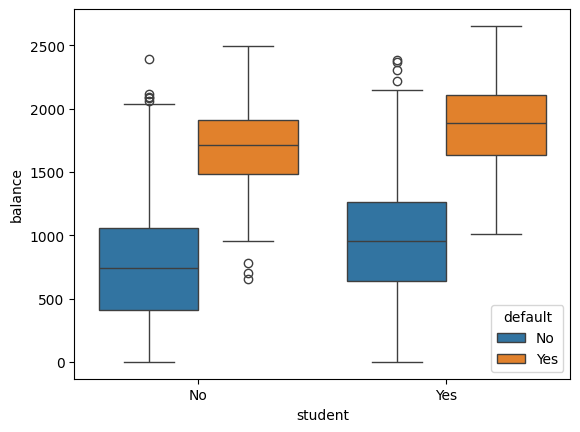

In [5]:
sns.boxplot(x='student', y='balance', data=default, hue='default');

In summary, individuals with higher balances are more likely to default, regardless of their student status. The balance is a significant factor in defaulting for both students and non-students.

## **Why not use linear regression for classification problems?**

Although we can assign numbers to categories (like 0 for 'No' and 1 for 'Yes'), there usually isn't a natural order or way to separate these categories that makes sense. Linear regression is designed to work with continuous numerical data, not categories.

Even in a simple case with just two categories (like 'Yes' and 'No'), using linear regression can lead to problems. It can give us predicted values that are not valid probabilities, meaning it might predict values less than 0 or greater than 1, which don't make sense for probabilities.

In [6]:
import statsmodels.formula.api as smf
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [7]:
# make column for Yes defaults
default['Yes'] = (default['default'] == 'Yes').astype(int)

<Axes: xlabel='balance', ylabel='Yes'>

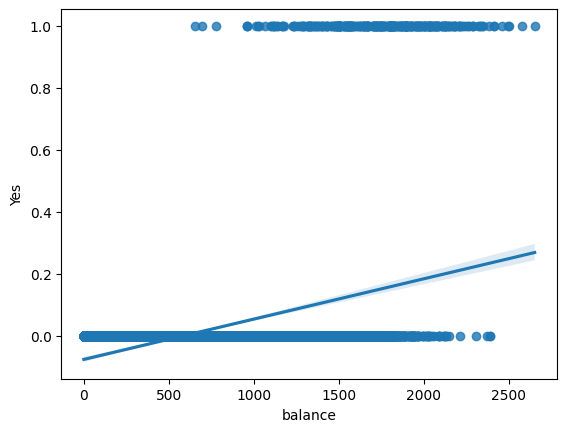

In [8]:
# linear regression model for default
# not ideal and could be made better by simply making all probabilites < 0 equal to 0
# and all probabilites > 1 equal to 1

sns.regplot(x='balance', y='Yes', data=default)

### **Logistic Regression**

**Purpose:**
Logistic regression is a method used to predict the probability of a certain class or event, such as "yes" or "no," based on one or more features. It ensures the output is always a number between 0 and 1, representing a probability.

**How It Works:**

- Function Choice: To make sure the output is always between 0 and 1, logistic regression uses a specific function called the logistic (or sigmoid) function.

- Probability Output: This function takes the input (a combination of your features) and transforms it into a probability. This probability tells you how likely it is that a certain event (like defaulting on a loan) will happen.

**Why Use It Instead of Linear Regression?:**

- Probabilities Between 0 and 1: Logistic regression is specifically designed to produce outputs between 0 and 1, which makes sense for probabilities. Linear regression, on the other hand, can produce values outside this range, which doesn't make sense for probabilities.

- Non-Linear Relationship: Logistic regression doesn't assume a straight-line relationship between the features and the outcome. Instead, it models a more complex relationship that fits the nature of probability.

**Example:**

- Imagine you're trying to predict whether someone will default on a loan based on their age. Logistic regression will take the age and use it to calculate the probability of default.

- If we find that increasing the age by one year changes the probability in a certain way, logistic regression will model this relationship accurately and ensure the probability stays within the 0 to 1 range.

In summary, logistic regression is a tool that predicts probabilities while ensuring the results make sense (i.e., they stay between 0 and 1) and models the relationship between features and the probability in a flexible way.


---



### **Estimating Coefficients in Logistic Regression**

**Linear Regression Recap:**

- In linear regression, we find the best-fitting line by minimizing the squared differences (residuals) between the observed values and the predicted values.

**Logistic Regression Approach:**

- Logistic regression works differently because it deals with probabilities.

**Maximum Likelihood Method:**

- Instead of minimizing residuals, logistic regression uses a method called "maximum likelihood" to find the best coefficients (parameters).

**How Maximum Likelihood Works:**

1. **Probability of Each Observation:**

- For each data point, the logistic regression model calculates the probability that the data point belongs to a certain class (like "default" or "no default").

2. **Multiplying Probabilities:**

- The method multiplies the probabilities of all data points together. This product represents how likely it is that the model's predictions match the actual data.

3. **Maximizing the Product:**

- The goal is to find the set of coefficients that make this product as large as possible. This means the model's predictions are as close to the actual data as they can be.

In [9]:
results = smf.logit('Yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 May 2024   Pseudo R-squ.:                  0.4534
Time:                        08:09:47   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

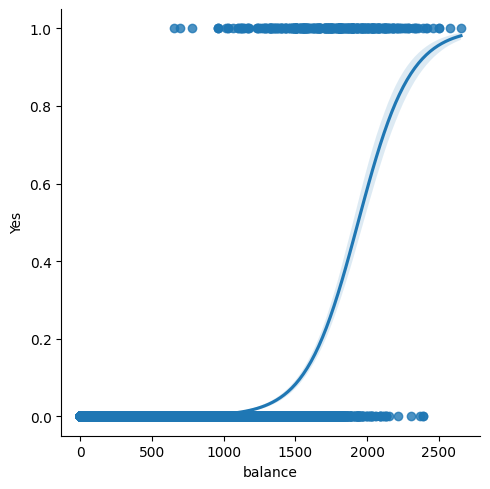

In [11]:
# Looks quite a bit different than the linear regression model
sns.lmplot(x='balance', y='Yes', data=default, logistic=True)